<a href="https://colab.research.google.com/github/vlrhsgody/AI2/blob/main/DL_CSE_CIC_IDS2018_LSTM_24_02_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
import pandas as pd
from google.colab import drive

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:

import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [10]:

df1 = pd.read_csv("/content/drive/MyDrive/CSE-CIC-IDS2018/02-14-2018.csv" ,  nrows=10000)
df2 = pd.read_csv("/content/drive/MyDrive/CSE-CIC-IDS2018/02-15-2018.csv",  nrows=10000)
df3 = pd.read_csv("/content/drive/MyDrive/CSE-CIC-IDS2018/02-16-2018.csv",  nrows=10000)
df4 = pd.read_csv('/content/drive/MyDrive/CSE-CIC-IDS2018/02-20-2018.csv', nrows=10000)



In [11]:
df5 = pd.read_csv('/content/drive/MyDrive/CSE-CIC-IDS2018/02-21-2018.csv', nrows=10000)
df6 = pd.read_csv('/content/drive/MyDrive/CSE-CIC-IDS2018/02-22-2018.csv',  nrows=10000)
df7 = pd.read_csv('/content/drive/MyDrive/CSE-CIC-IDS2018/02-23-2018.csv',  nrows=10000)
df8 = pd.read_csv('/content/drive/MyDrive/CSE-CIC-IDS2018/02-28-2018.csv',  nrows=10000)
df9 = pd.read_csv('/content/drive/MyDrive/CSE-CIC-IDS2018/03-01-2018.csv',  nrows=10000)
df10 = pd.read_csv('/content/drive/MyDrive/CSE-CIC-IDS2018/03-02-2018.csv',  nrows=10000)


In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
df1['Label'].value_counts()

FTP-BruteForce    9904
Benign              96
Name: Label, dtype: int64

In [14]:
def fix_data_type(df):

    df = df[df['Dst Port'] != 'Dst Port']

    df['Dst Port'] = df['Dst Port'].astype(int)
    df['Protocol'] = df['Protocol'].astype(int)
    df['Flow Duration'] = df['Flow Duration'].astype(int)
    df['Tot Fwd Pkts'] = df['Tot Fwd Pkts'].astype(int)
    df['Tot Bwd Pkts'] = df['Tot Bwd Pkts'].astype(int)
    df['TotLen Fwd Pkts'] = df['TotLen Fwd Pkts'].astype(int)
    df['TotLen Bwd Pkts'] = df['TotLen Bwd Pkts'].astype(int)
    df['Fwd Pkt Len Max'] = df['Fwd Pkt Len Max'].astype(int)
    df['Fwd Pkt Len Min'] = df['Fwd Pkt Len Min'].astype(int)
    df['Fwd Pkt Len Mean'] = df['Fwd Pkt Len Mean'].astype(float)
    df['Fwd Pkt Len Std'] = df['Fwd Pkt Len Std'].astype(float)
    df['Bwd Pkt Len Max'] = df['Bwd Pkt Len Max'].astype(int)
    df['Bwd Pkt Len Min'] = df['Bwd Pkt Len Min'].astype(int)
    df['Bwd Pkt Len Mean'] = df['Bwd Pkt Len Mean'].astype(float)
    df['Bwd Pkt Len Std'] = df['Bwd Pkt Len Std'].astype(float)
    df['Flow Byts/s'] = df['Flow Byts/s'].astype(float)
    df['Flow Pkts/s'] = df['Flow Pkts/s'].astype(float)
    df['Flow IAT Mean'] = df['Flow IAT Mean'].astype(float)
    df['Flow IAT Std'] = df['Flow IAT Std'].astype(float)
    df['Flow IAT Max'] = df['Flow IAT Max'].astype(int)
    df['Flow IAT Min'] = df['Flow IAT Min'].astype(int)
    df['Fwd IAT Tot'] = df['Fwd IAT Tot'].astype(int)
    df['Fwd IAT Mean'] = df['Fwd IAT Mean'].astype(float)
    df['Fwd IAT Std'] = df['Fwd IAT Std'].astype(float)
    df['Fwd IAT Max'] = df['Fwd IAT Max'].astype(int)
    df['Fwd IAT Min'] = df['Fwd IAT Min'].astype(int)
    df['Bwd IAT Tot'] = df['Bwd IAT Tot'].astype(int)
    df['Bwd IAT Mean'] = df['Bwd IAT Mean'].astype(float)
    df['Bwd IAT Std'] = df['Bwd IAT Std'].astype(float)
    df['Bwd IAT Max'] = df['Bwd IAT Max'].astype(int)
    df['Bwd IAT Min'] = df['Bwd IAT Min'].astype(int)
    df['Fwd PSH Flags'] = df['Fwd PSH Flags'].astype(int)
    df['Bwd PSH Flags'] = df['Bwd PSH Flags'].astype(int)
    df['Fwd URG Flags'] = df['Fwd URG Flags'].astype(int)
    df['Bwd URG Flags'] = df['Bwd URG Flags'].astype(int)
    df['Fwd Header Len'] = df['Fwd Header Len'].astype(int)
    df['Bwd Header Len'] = df['Bwd Header Len'].astype(int)
    df['Fwd Pkts/s'] = df['Fwd Pkts/s'].astype(float)
    df['Bwd Pkts/s'] = df['Bwd Pkts/s'].astype(float)
    df['Pkt Len Min'] = df['Pkt Len Min'].astype(int)
    df['Pkt Len Max'] = df['Pkt Len Max'].astype(int)
    df['Pkt Len Mean'] = df['Pkt Len Mean'].astype(float)
    df['Pkt Len Std'] = df['Pkt Len Std'].astype(float)
    df['Pkt Len Var'] = df['Pkt Len Var'].astype(float)
    df['FIN Flag Cnt'] = df['FIN Flag Cnt'].astype(int)
    df['SYN Flag Cnt'] = df['SYN Flag Cnt'].astype(int)
    df['RST Flag Cnt'] = df['RST Flag Cnt'].astype(int)
    df['PSH Flag Cnt'] = df['PSH Flag Cnt'].astype(int)
    df['ACK Flag Cnt'] = df['ACK Flag Cnt'].astype(int)
    df['URG Flag Cnt'] = df['URG Flag Cnt'].astype(int)
    df['CWE Flag Count'] = df['CWE Flag Count'].astype(int)
    df['ECE Flag Cnt'] = df['ECE Flag Cnt'].astype(int)
    df['Down/Up Ratio'] = df['Down/Up Ratio'].astype(int)
    df['Pkt Size Avg'] = df['Pkt Size Avg'].astype(float)
    df['Fwd Seg Size Avg'] = df['Fwd Seg Size Avg'].astype(float)
    df['Bwd Seg Size Avg'] = df['Bwd Seg Size Avg'].astype(float)
    df['Fwd Byts/b Avg'] = df['Fwd Byts/b Avg'].astype(int)
    df['Fwd Pkts/b Avg'] = df['Fwd Pkts/b Avg'].astype(int)
    df['Fwd Blk Rate Avg'] = df['Fwd Blk Rate Avg'].astype(int)
    df['Bwd Byts/b Avg'] = df['Bwd Byts/b Avg'].astype(int)
    df['Bwd Pkts/b Avg'] = df['Bwd Pkts/b Avg'].astype(int)
    df['Bwd Blk Rate Avg'] = df['Bwd Blk Rate Avg'].astype(int)
    df['Subflow Fwd Pkts'] = df['Subflow Fwd Pkts'].astype(int)
    df['Subflow Fwd Byts'] = df['Subflow Fwd Byts'].astype(int)
    df['Subflow Bwd Pkts'] = df['Subflow Bwd Pkts'].astype(int)
    df['Subflow Bwd Byts'] = df['Subflow Bwd Byts'].astype(int)
    df['Init Fwd Win Byts'] = df['Init Fwd Win Byts'].astype(int)
    df['Init Bwd Win Byts'] = df['Init Bwd Win Byts'].astype(int)
    df['Fwd Act Data Pkts'] = df['Fwd Act Data Pkts'].astype(int)
    df['Fwd Seg Size Min'] = df['Fwd Seg Size Min'].astype(int)
    df['Active Mean'] = df['Active Mean'].astype(float)
    df['Active Std'] = df['Active Std'].astype(float)
    df['Active Max'] = df['Active Max'].astype(int)
    df['Active Min'] = df['Active Min'].astype(int)
    df['Idle Mean'] = df['Idle Mean'].astype(float)
    df['Idle Std'] = df['Idle Std'].astype(float)
    df['Idle Max'] = df['Idle Max'].astype(int)
    df['Idle Min'] = df['Idle Min'].astype(int)

    return df

In [15]:

df_d1 = fix_data_type(df1)
df_d2 = fix_data_type(df2)
df_d3 = fix_data_type(df3)
df_d4 = fix_data_type(df4)
df_d5 = fix_data_type(df5)
df_d6 = fix_data_type(df6)
df_d7 = fix_data_type(df7)
df_d8 = fix_data_type(df8)
df_d9 = fix_data_type(df9)
df_d10 = fix_data_type(df10)

In [16]:
def drop_infinate_null(df):
    print(df.shape)

    # replace infinity value as null value
    df = df.replace(["Infinity", "infinity"], np.inf)
    df = df.replace([np.inf, -np.inf], np.nan)

    # drop all null values
    df = df.dropna()

    print(df.shape)

    return df

In [17]:
%%time
df_d1 = drop_infinate_null(df_d1)
df_d2 = drop_infinate_null(df_d2)
df_d3 = drop_infinate_null(df_d3)
df_d4 = drop_infinate_null(df_d4)
df_d5 = drop_infinate_null(df_d5)
df_d6 = drop_infinate_null(df_d6)
df_d7 = drop_infinate_null(df_d7)
df_d8 = drop_infinate_null(df_d8)
df_d9 = drop_infinate_null(df_d9)
df_d10 = drop_infinate_null(df_d10)

(10000, 80)
(10000, 80)
(10000, 80)
(10000, 80)
(10000, 80)
(10000, 80)
(10000, 84)
(10000, 84)
(10000, 80)
(10000, 80)
(10000, 80)
(9925, 80)
(10000, 80)
(9935, 80)
(10000, 80)
(9801, 80)
(9999, 80)
(9753, 80)
(10000, 80)
(9968, 80)
CPU times: user 410 ms, sys: 63 ms, total: 473 ms
Wall time: 682 ms


In [18]:
def generate_binary_label(df):
    # encode the target feature
    df['Threat'] = df['Label'].apply(lambda x: "Benign" if x == 'Benign' else "Malicious")
    print(df['Threat'].unique())
    print(df['Threat'].value_counts())
    return df

In [19]:
%%time
df_d1 = generate_binary_label(df_d1)
df_d2 = generate_binary_label(df_d2)
df_d3 = generate_binary_label(df_d3)
df_d4 = generate_binary_label(df_d4)
df_d5 = generate_binary_label(df_d5)
df_d6 = generate_binary_label(df_d6)
df_d7 = generate_binary_label(df_d7)
df_d8 = generate_binary_label(df_d8)
df_d9 = generate_binary_label(df_d9)
df_d10 = generate_binary_label(df_d10)

['Benign' 'Malicious']
Malicious    9904
Benign         96
Name: Threat, dtype: int64
['Benign' 'Malicious']
Malicious    9931
Benign         69
Name: Threat, dtype: int64
['Benign' 'Malicious']
Malicious    9899
Benign        101
Name: Threat, dtype: int64
['Benign' 'Malicious']
Malicious    9934
Benign         66
Name: Threat, dtype: int64
['Benign' 'Malicious']
Malicious    7800
Benign       2200
Name: Threat, dtype: int64
['Benign' 'Malicious']
Benign       9563
Malicious     362
Name: Threat, dtype: int64
['Benign' 'Malicious']
Benign       9369
Malicious     566
Name: Threat, dtype: int64
['Benign']
Benign    9801
Name: Threat, dtype: int64
['Benign']
Benign    9753
Name: Threat, dtype: int64
['Benign' 'Malicious']
Malicious    8520
Benign       1448
Name: Threat, dtype: int64
CPU times: user 115 ms, sys: 1.34 ms, total: 117 ms
Wall time: 344 ms


In [20]:


mapping= {'SSH-Bruteforce': 'Brute-force',
          'FTP-BruteForce': 'Brute-force',
          ################ Brute-force

          'Brute Force -XSS': 'Web attack',
          'Brute Force -Web': 'Web attack',
          'SQL Injection': 'Web attack',
          ################ Web attack

          'DoS attacks-Hulk': 'DoS attack',
          'DoS attacks-SlowHTTPTest': 'DoS attack',
          'DoS attacks-Slowloris': 'DoS attack',
          'DoS attacks-GoldenEye': 'DoS attack',
          ################ DoS attack

          'DDOS attack-HOIC': 'DDoS attack',
          'DDOS attack-LOIC-UDP': 'DDoS attack',
          'DDoS attacks-LOIC-HTTP': 'DDoS attack',
          ################ DDoS attack

          'Bot': 'Botnet',
          ################ Botnet

          'Infilteration': 'Infilteration',
          ################ Infilteration

          'Benign': 'Benign',
          'Label': 'Benign',
          ################ Infilteration
    }

def transform_multi_label(df):
    print(df['Label'].value_counts())
    df['Label'] = df['Label'].map(mapping)
    return df

In [21]:
%%time
df_d1 = transform_multi_label(df_d1)
df_d2 = transform_multi_label(df_d2)
df_d3 = transform_multi_label(df_d3)
df_d4 = transform_multi_label(df_d4)
df_d5 = transform_multi_label(df_d5)
df_d6 = transform_multi_label(df_d6)
df_d7 = transform_multi_label(df_d7)
df_d8 = transform_multi_label(df_d8)
df_d9 = transform_multi_label(df_d9)
df_d10 = transform_multi_label(df_d10)

FTP-BruteForce    9904
Benign              96
Name: Label, dtype: int64
DoS attacks-GoldenEye    9931
Benign                     69
Name: Label, dtype: int64
DoS attacks-SlowHTTPTest    9899
Benign                       101
Name: Label, dtype: int64
DDoS attacks-LOIC-HTTP    9934
Benign                      66
Name: Label, dtype: int64
DDOS attack-HOIC        6070
Benign                  2200
DDOS attack-LOIC-UDP    1730
Name: Label, dtype: int64
Benign              9563
Brute Force -Web     249
Brute Force -XSS      79
SQL Injection         34
Name: Label, dtype: int64
Benign              9369
Brute Force -Web     362
Brute Force -XSS     151
SQL Injection         53
Name: Label, dtype: int64
Benign    9801
Name: Label, dtype: int64
Benign    9753
Name: Label, dtype: int64
Bot       8520
Benign    1448
Name: Label, dtype: int64
CPU times: user 79.2 ms, sys: 160 µs, total: 79.3 ms
Wall time: 121 ms


In [22]:
from imblearn.under_sampling import RandomUnderSampler

def balance_data(df):
    X=df.drop(["Label"], axis=1)
    y=df["Label"]

    rus = RandomUnderSampler()
    X_balanced, y_balanced = rus.fit_resample(X, y)

    df = pd.concat([X_balanced, y_balanced], axis=1)
    del X, y, X_balanced, y_balanced
    print (df.shape)
    print(df['Label'].value_counts())

    return df

In [26]:
df_d1 = balance_data(df_d1)
df_d2 = balance_data(df_d2)
df_d3 = balance_data(df_d3)
df_d4 = balance_data(df_d4)
df_d5 = balance_data(df_d5)
df_d6 = balance_data(df_d6)
df_d7 = balance_data(df_d7)
df_d10 = balance_data(df_d10)

(192, 81)
Benign         96
Brute-force    96
Name: Label, dtype: int64
(138, 81)
Benign        69
DoS attack    69
Name: Label, dtype: int64
(202, 81)
Benign        101
DoS attack    101
Name: Label, dtype: int64
(132, 85)
Benign         66
DDoS attack    66
Name: Label, dtype: int64
(4400, 81)
Benign         2200
DDoS attack    2200
Name: Label, dtype: int64
(724, 81)
Benign        362
Web attack    362
Name: Label, dtype: int64
(1132, 81)
Benign        566
Web attack    566
Name: Label, dtype: int64
(2896, 81)
Benign    1448
Botnet    1448
Name: Label, dtype: int64


In [27]:
df_all = pd.concat([df_d1, df_d2], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d1, df_d2

df_all = pd.concat([df_all, df_d3], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d3

df_all = pd.concat([df_all, df_d4], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d4

df_all = pd.concat([df_all, df_d5], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d5

df_all = pd.concat([df_all, df_d6], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d6

df_all = pd.concat([df_all, df_d7], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d7

df_all = pd.concat([df_all, df_d8], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d8

df_all = pd.concat([df_all, df_d9], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d9

df_all = pd.concat([df_all, df_d10], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d10

In [28]:
print(df_all['Label'].value_counts())

Benign         24462
DDoS attack     2266
Botnet          1448
Web attack       928
DoS attack       170
Brute-force       96
Name: Label, dtype: int64


In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Text(0.5, 1.0, 'Label')

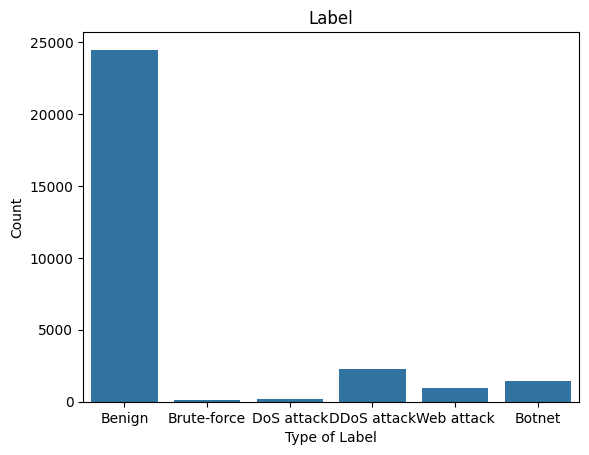

In [30]:
sns.countplot(data = df_all, x="Label")
plt.xlabel("Type of Label")
plt.ylabel("Count")
plt.title("Label")

In [31]:
variances = df_all.var(numeric_only=True)
constant_columns = variances[variances == 0].index
df_all = df_all.drop(constant_columns, axis=1)

print(constant_columns)
print (df_all.shape)

Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg'],
      dtype='object')
(29370, 77)


In [32]:
duplicates = set()
for i in range(0, len(df_all.columns)):
    col1 = df_all.columns[i]
    for j in range(i+1, len(df_all.columns)):
        col2 = df_all.columns[j]
        if(df_all[col1].equals(df_all[col2])):
            duplicates.add(col2)

In [33]:
print (duplicates)
df_all.drop(duplicates, axis=1, inplace=True)
print (df_all.shape)

{'Bwd Seg Size Avg', 'CWE Flag Count', 'Subflow Fwd Byts', 'SYN Flag Cnt', 'Fwd Seg Size Avg', 'Subflow Bwd Pkts', 'ECE Flag Cnt', 'Subflow Fwd Pkts'}
(29370, 69)


In [34]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29370 entries, 0 to 29369
Data columns (total 69 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst Port           29370 non-null  int64  
 1   Protocol           29370 non-null  int64  
 2   Timestamp          29370 non-null  object 
 3   Flow Duration      29370 non-null  int64  
 4   Tot Fwd Pkts       29370 non-null  int64  
 5   Tot Bwd Pkts       29370 non-null  int64  
 6   TotLen Fwd Pkts    29370 non-null  int64  
 7   TotLen Bwd Pkts    29370 non-null  int64  
 8   Fwd Pkt Len Max    29370 non-null  int64  
 9   Fwd Pkt Len Min    29370 non-null  int64  
 10  Fwd Pkt Len Mean   29370 non-null  float64
 11  Fwd Pkt Len Std    29370 non-null  float64
 12  Bwd Pkt Len Max    29370 non-null  int64  
 13  Bwd Pkt Len Min    29370 non-null  int64  
 14  Bwd Pkt Len Mean   29370 non-null  float64
 15  Bwd Pkt Len Std    29370 non-null  float64
 16  Flow Byts/s        293

In [81]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df_all['Label_Encoded'] = label_encoder.fit_transform(df_all['Label'])
df_all['Thread_Encoded'] = label_encoder.fit_transform(df_all['Threat'])
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29370 entries, 0 to 29369
Data columns (total 71 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst Port           29370 non-null  int64  
 1   Protocol           29370 non-null  int64  
 2   Timestamp          29370 non-null  object 
 3   Flow Duration      29370 non-null  int64  
 4   Tot Fwd Pkts       29370 non-null  int64  
 5   Tot Bwd Pkts       29370 non-null  int64  
 6   TotLen Fwd Pkts    29370 non-null  int64  
 7   TotLen Bwd Pkts    29370 non-null  int64  
 8   Fwd Pkt Len Max    29370 non-null  int64  
 9   Fwd Pkt Len Min    29370 non-null  int64  
 10  Fwd Pkt Len Mean   29370 non-null  float64
 11  Fwd Pkt Len Std    29370 non-null  float64
 12  Bwd Pkt Len Max    29370 non-null  int64  
 13  Bwd Pkt Len Min    29370 non-null  int64  
 14  Bwd Pkt Len Mean   29370 non-null  float64
 15  Bwd Pkt Len Std    29370 non-null  float64
 16  Flow Byts/s        293

In [70]:
df_all.isnull().sum()

Dst Port              0
Protocol              0
Timestamp             0
Flow Duration         0
Tot Fwd Pkts          0
                  ...  
Src IP            29238
Src Port          29238
Dst IP            29238
Label_Encoded         0
Thread_Encoded        0
Length: 71, dtype: int64

In [71]:
df_all.nunique()

Dst Port           2140
Protocol              3
Timestamp         13755
Flow Duration     20897
Tot Fwd Pkts        648
                  ...  
Src IP               30
Src Port             86
Dst IP                4
Label_Encoded         6
Thread_Encoded        2
Length: 71, dtype: int64

In [72]:
df_all.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       

In [82]:
X = df_all.drop(['Label', 'Label_Encoded', 'Timestamp', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Threat'], axis=1)
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29370 entries, 0 to 29369
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Protocol           29370 non-null  int64  
 1   Flow Duration      29370 non-null  int64  
 2   Tot Fwd Pkts       29370 non-null  int64  
 3   Tot Bwd Pkts       29370 non-null  int64  
 4   TotLen Fwd Pkts    29370 non-null  int64  
 5   TotLen Bwd Pkts    29370 non-null  int64  
 6   Fwd Pkt Len Max    29370 non-null  int64  
 7   Fwd Pkt Len Min    29370 non-null  int64  
 8   Fwd Pkt Len Mean   29370 non-null  float64
 9   Fwd Pkt Len Std    29370 non-null  float64
 10  Bwd Pkt Len Max    29370 non-null  int64  
 11  Bwd Pkt Len Min    29370 non-null  int64  
 12  Bwd Pkt Len Mean   29370 non-null  float64
 13  Bwd Pkt Len Std    29370 non-null  float64
 14  Flow Byts/s        29370 non-null  float64
 15  Flow Pkts/s        29370 non-null  float64
 16  Flow IAT Mean      293

In [83]:
X.isnull().sum()

Protocol           0
Flow Duration      0
Tot Fwd Pkts       0
Tot Bwd Pkts       0
TotLen Fwd Pkts    0
                  ..
Idle Mean          0
Idle Std           0
Idle Max           0
Idle Min           0
Thread_Encoded     0
Length: 62, dtype: int64

In [84]:
y=df_all['Label_Encoded']
y.value_counts()

0    24462
3     2266
1     1448
5      928
4      170
2       96
Name: Label_Encoded, dtype: int64

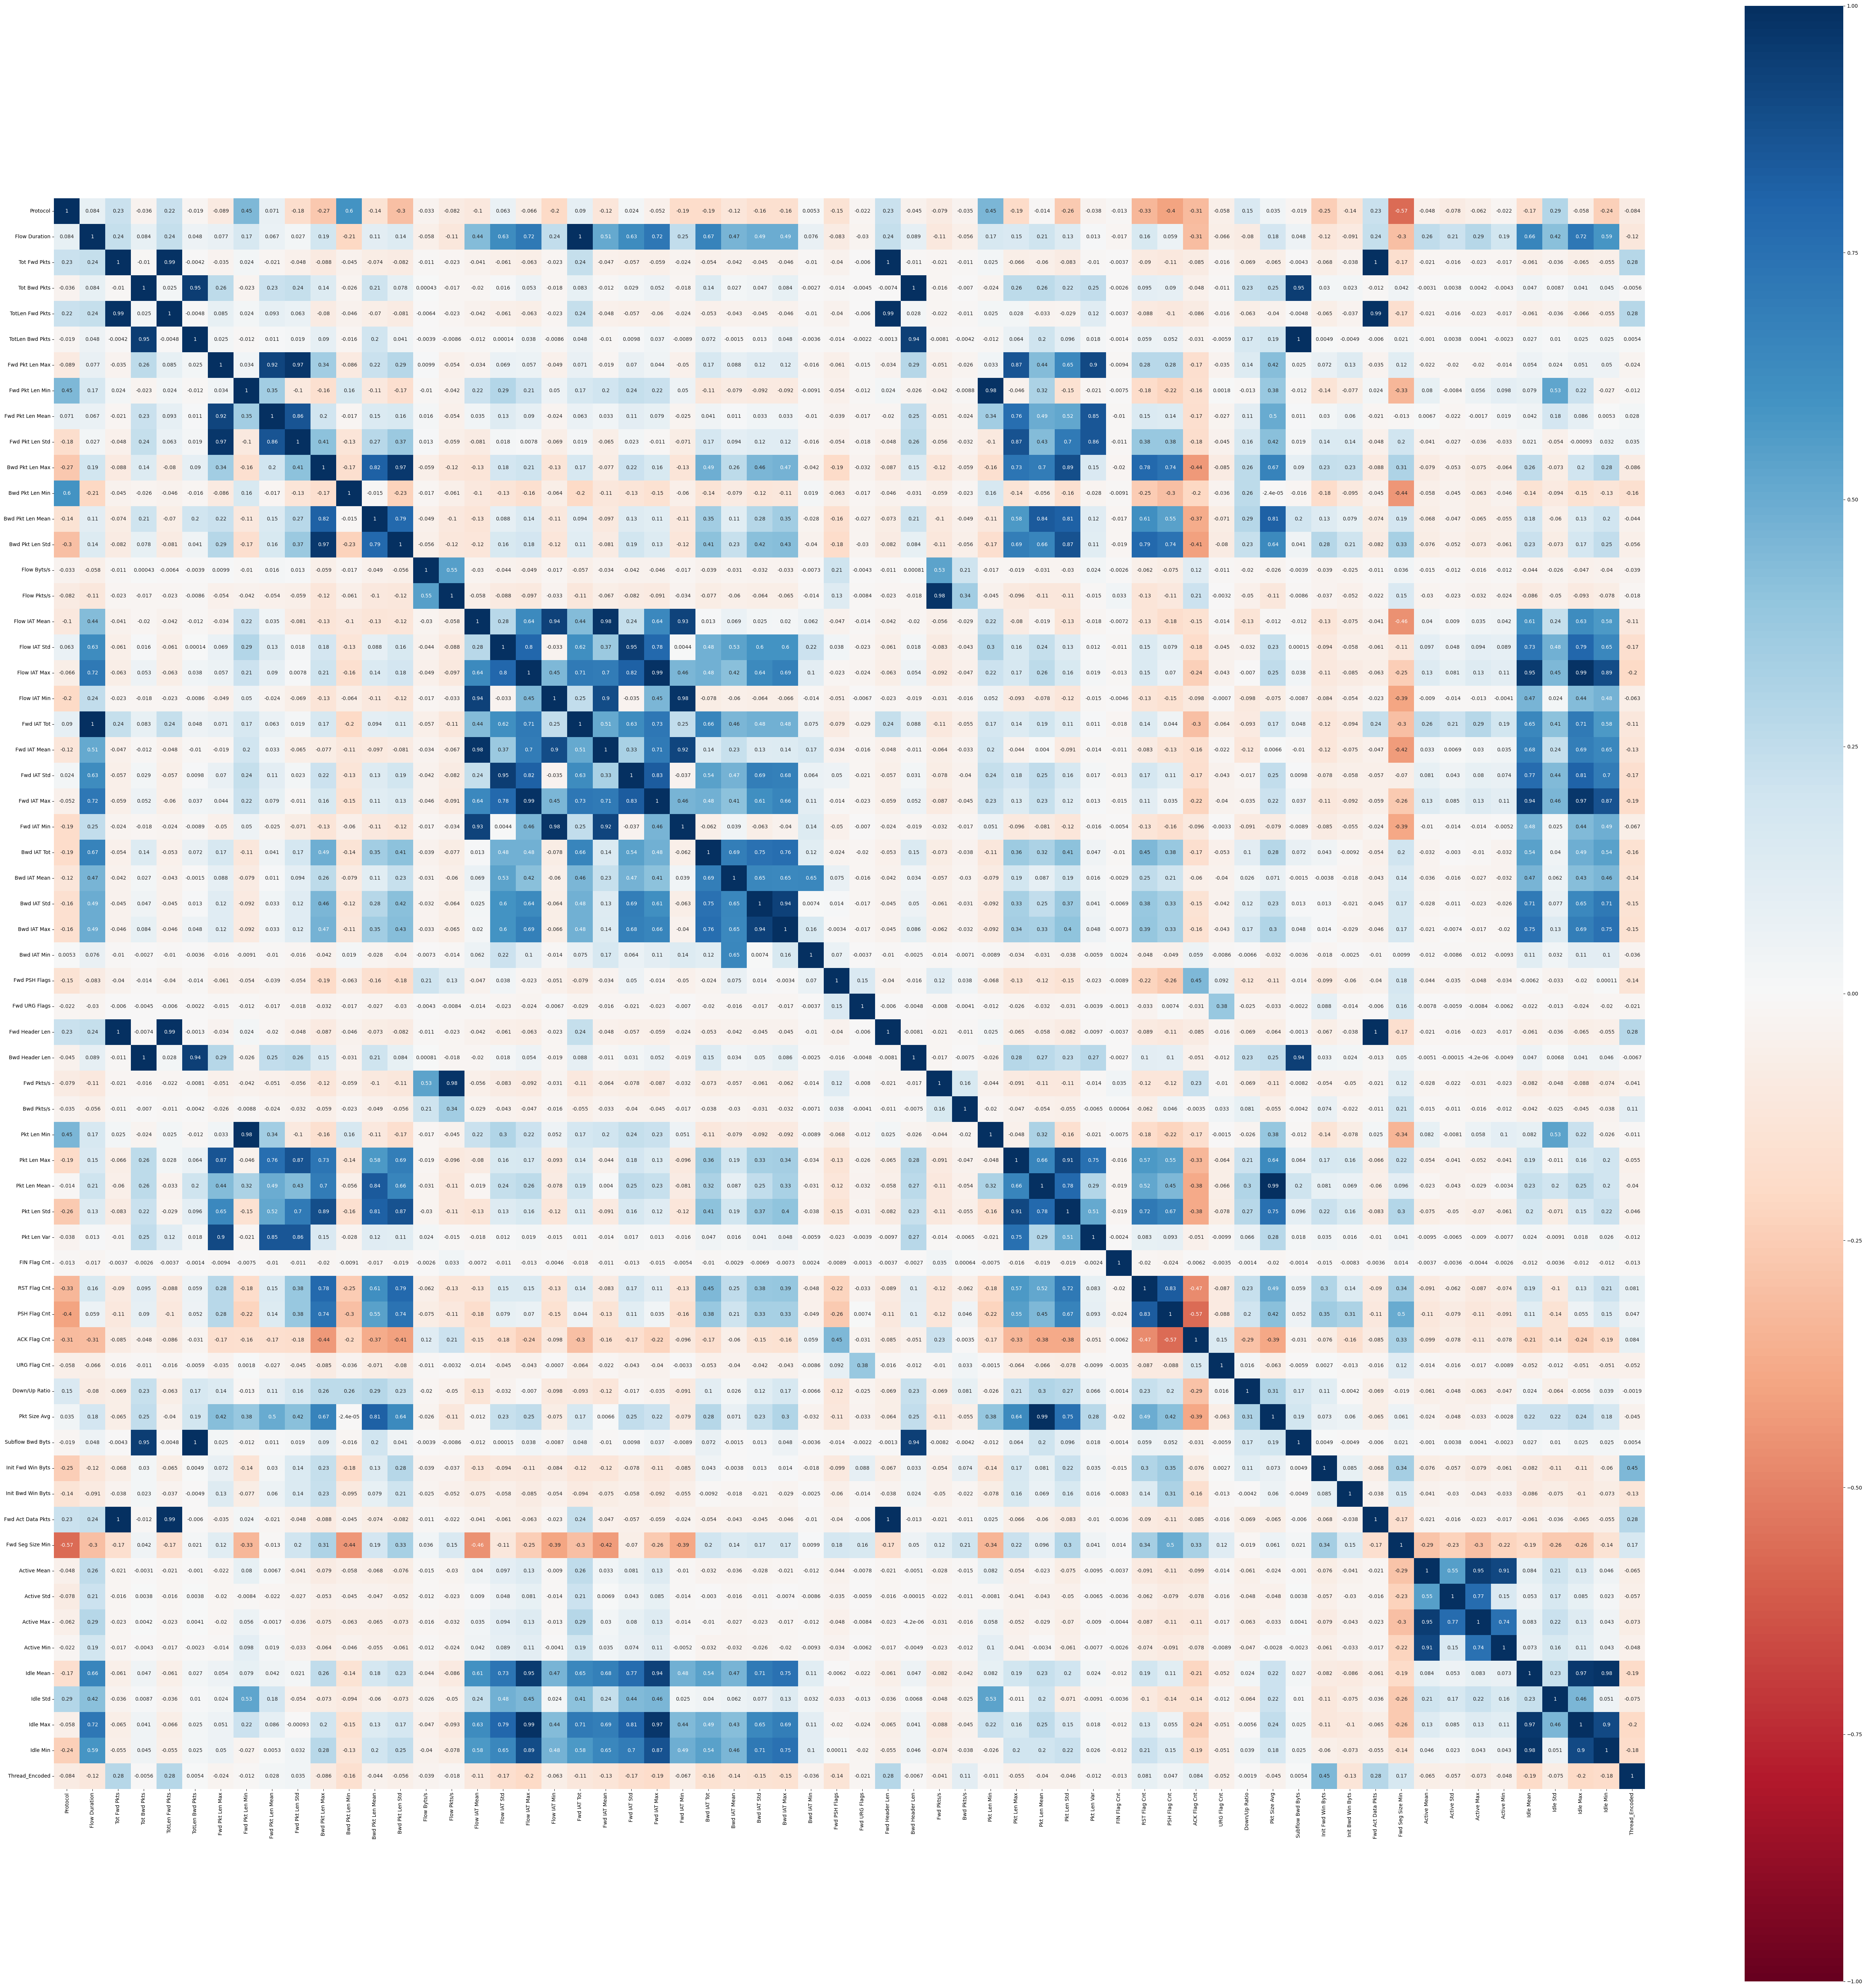

In [85]:
from matplotlib import pyplot as plt
import seaborn as sns

# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = X.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [86]:

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [87]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29370 entries, 0 to 29369
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Protocol           29370 non-null  int64  
 1   Flow Duration      29370 non-null  int64  
 2   Tot Fwd Pkts       29370 non-null  int64  
 3   Tot Bwd Pkts       29370 non-null  int64  
 4   TotLen Fwd Pkts    29370 non-null  int64  
 5   TotLen Bwd Pkts    29370 non-null  int64  
 6   Fwd Pkt Len Max    29370 non-null  int64  
 7   Fwd Pkt Len Min    29370 non-null  int64  
 8   Fwd Pkt Len Mean   29370 non-null  float64
 9   Fwd Pkt Len Std    29370 non-null  float64
 10  Bwd Pkt Len Max    29370 non-null  int64  
 11  Bwd Pkt Len Min    29370 non-null  int64  
 12  Bwd Pkt Len Mean   29370 non-null  float64
 13  Bwd Pkt Len Std    29370 non-null  float64
 14  Flow Byts/s        29370 non-null  float64
 15  Flow Pkts/s        29370 non-null  float64
 16  Flow IAT Mean      293

In [88]:
dfx = MinMaxScaler(X)
dfy = y
dfx.describe()

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Thread_Encoded
count,29370.000000,29370.000000,29370.000000,29370.000000,29370.000000,29370.000000,29370.000000,29370.000000,29370.000000,29370.000000,...,29370.000000,29370.000000,29370.000000,29370.000000,29370.000000,29370.000000,29370.000000,29370.000000,29370.000000,29370.000000
mean,0.488404,0.249306,0.007743,0.000792,0.007736,0.000368,0.003244,0.019080,0.003673,0.003762,...,0.381967,0.008595,0.007059,0.012269,0.005810,0.066036,0.020048,0.077394,0.058124,0.167109
std,0.288126,0.390458,0.060564,0.008146,0.059864,0.007714,0.009872,0.073122,0.010403,0.009817,...,0.151117,0.051795,0.055554,0.068244,0.043792,0.137363,0.071377,0.150294,0.133801,0.373080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.352941,0.000005,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.352941,0.001055,0.000008,0.000104,0.000009,0.000004,0.000667,0.000000,0.001936,0.000000,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.352941,0.508313,0.000035,0.000731,0.000075,0.000087,0.005059,0.000000,0.004537,0.006416,...,0.454545,0.000423,0.000000,0.001039,0.000158,0.083673,0.000000,0.083780,0.050202,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
X = dfx.values.tolist()
y = dfy.values.tolist()

In [119]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.35294117439446365, 0.00012270000306749998, 7.708822361748935e-06, 0.0004175365344424056, 3.8445490780275546e-05, 1.0144927536231811e-05, 0.005058969584101398, 0.0, 0.00657417892540406, 0.010228260804180992, 0.014157458563372955, 0.0, 0.017893993198046652, 0.02556263734995831, 0.00012812493554655865, 0.00015845508751869214, 2.0541578854800653e-05, 0.00010649650254269431, 0.00011640972223861687, 1.674357731234222e-07, 3.874999999999997e-06, 1.9464408625597832e-06, 4.039011835443032e-06, 3.457548714998668e-06, 4.353330101208977e-07, 0.00011943333333333323, 5.232566629791888e-05, 0.00010163753016709497, 0.0001264181818181817, 5.147864184008756e-07, 0.0, 0.0, 3.4689566920027314e-05, 0.0004798064085444761, 6.790668978725063e-05, 0.0001358234295499932, 0.0, 0.005058969584101398, 0.01750829872384764, 0.010985068410753899, 0.00012067172797438041, 0.0, 0.9999999000000099, 0.9999999000000099, 0.0, 0.0, 0.012499999984375001, 0.0200016373988259, 1.0164722227909552e-05, 0.12501525878887174, 0.00

In [120]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 29360 29360


In [121]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (20552, 10, 62) (20552,)
테스트 데이터의 크기 : (8808, 10, 62) (8808,)


In [122]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN

In [123]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(RNN(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

# 모델 초기화
model = Sequential()

# 첫 번째 RNN 레이어와 Dropout 레이어 추가
model.add(SimpleRNN(20, activation='relu', input_shape=(X.shape[1:]), return_sequences=True))
model.add(Dropout(0.5))

# 두 번째 RNN 레이어와 Dropout 레이어 추가
model.add(SimpleRNN(20, activation='relu'))
model.add(Dropout(0.3))

# 최종 출력을 위한 Dense 레이어 추가
model.add(Dense(1))

# 모델 요약 출력
model.summary()

TypeError: RNN.__init__() missing 1 required positional argument: 'cell'

In [128]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 62)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 10, 20)            6640      
                                                                 
 dropout_20 (Dropout)        (None, 10, 20)            0         
                                                                 
 lstm_22 (LSTM)              (None, 20)                3280      
                                                                 
 dropout_21 (Dropout)        (None, 20)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 9,941
Trainable params: 9,941
Non-trainable params: 0
_________________________________________________________________


In [129]:

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
686/686 [==============================] - 13s 13ms/step - loss: 0.2528
Epoch 2/70
686/686 [==============================] - 10s 15ms/step - loss: 0.0860
Epoch 3/70
686/686 [==============================] - 10s 15ms/step - loss: 0.0668
Epoch 4/70
686/686 [==============================] - 9s 13ms/step - loss: 0.0582
Epoch 5/70
686/686 [==============================] - 10s 15ms/step - loss: 0.0507
Epoch 6/70
686/686 [==============================] - 10s 14ms/step - loss: 0.0472
Epoch 7/70
686/686 [==============================] - 9s 13ms/step - loss: 0.0438
Epoch 8/70
686/686 [==============================] - 11s 16ms/step - loss: 0.0439
Epoch 9/70
686/686 [==============================] - 10s 15ms/step - loss: 0.0427
Epoch 10/70
686/686 [==============================] - 10s 14ms/step - loss: 0.0435
Epoch 11/70
686/686 [==============================] - 9s 14ms/step - loss: 0.0384
Epoch 12/70
686/686 [==============================] - 10s 15ms/step - loss: 0.0378
Epoc

In [130]:
model.evaluate(test_X, test_y)

276/276 [==============================] - 2s 5ms/step - loss: 2.4230


2.4229986667633057

In [131]:
y_pred = model.predict(test_X)

276/276 [==============================] - 1s 5ms/step


In [132]:
mse = tf.reduce_mean(tf.square(test_y - y_pred))

print(f'MSE: {mse.numpy()}')

MSE: 3.747746001849386


276/276 [==============================] - 3s 10ms/step


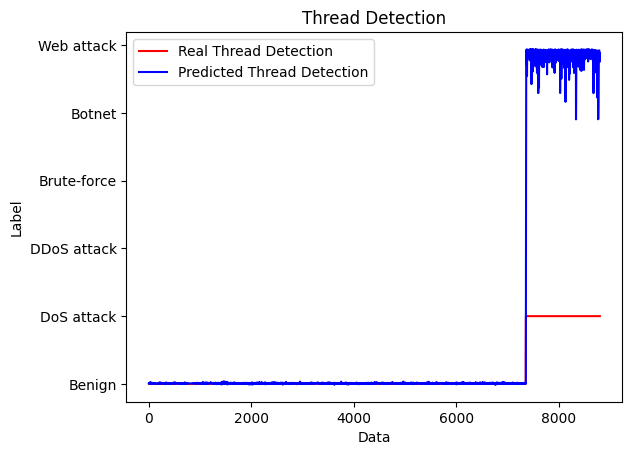

In [135]:
pred_y = model.predict(test_X)

# 라벨 설명
label_names = ['Benign', 'DoS attack', 'DDoS attack', 'Brute-force', 'Botnet', 'Web attack']

plt.figure()
plt.plot(test_y, color='red', label='Real Thread Detection')
plt.plot(pred_y, color='blue', label='Predicted Thread Detection')
plt.title('Thread Detection')
plt.xlabel('Data')
plt.ylabel('Label')

# 라벨 설명 추가
plt.yticks(np.arange(len(label_names)), label_names)

plt.legend()
plt.show()
